## Exploratory Data Analysis

We used this notebook to get familiar with the datasets we have. There is more than 10 questions we need to answer during the EDA.

Also see variable_analysis and feature_engineering to see the change when using log function to more closely represent normal distribution.


In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# import dataset
df = pd.read_csv('../data/flights.csv')
df_rm = df.copy()

In [3]:
# Remove outliers and nan arr_delays for delay analysis
df_rm = df_rm.dropna(subset = ['arr_delay'])

from scipy import stats
# df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
df_rm = df_rm[(np.abs(stats.zscore(df_rm['arr_delay'])) < 3)]

In [4]:
# look at column set
df.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime', 'no_name'],
      dtype='object')

#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

In [6]:
df_rm.arr_delay

0        -20.0
7          9.0
8        -13.0
9         14.0
10        67.0
          ... 
355979     0.0
355981     4.0
355982    30.0
355983     9.0
355984     1.0
Name: arr_delay, Length: 345668, dtype: float64

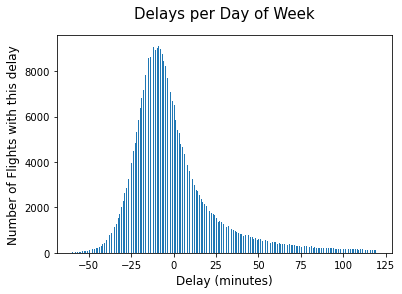

In [90]:
# Plot the delay distribution

# plt.hist(df_rm.arr_delay, bins=np.arange(-30,90, 1.6))

fig, ax = plt.subplots( figsize = (6,4))
ax.set_ylabel('Number of Flights with this delay', fontsize=12)
ax.set_xlabel('Delay (minutes)', fontsize=12)
ax.set_title('Delays per Day of Week', fontsize=15, y=1.05)
plt.hist(df.arr_delay, bins=np.arange(-60,120, 0.5))
plt.show()

The target skews to the left, this is also represented by its mean and median differences.  

#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [5]:
# We've chosen to take a more narrow sample to closely represent what model will be testing (first week of January, and 5 days on either side - not including Dec 25)
# However, the day of week/ holiday phenomenon would be interesting to look at:

def add_weekday(df):
    """ creates boolean column to indicate day of week 
        https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.weekday.html
        week starts 0 with monday) """

    df['weekday'] = df['fl_date'].astype('datetime64[ns]')

    f = lambda x: x.weekday()     
    df['weekday'] = df['weekday'].apply(f).astype('int32')
    return df

df = add_weekday(df)

In [9]:
# Calculate the mean delay for the day of the week

weekday_mean = df[['weekday', 'arr_delay']]
weekday_mean = weekday_mean.groupby(['weekday'], as_index=False).mean()
weekday_mean=weekday_mean.rename(columns={'arr_delay': 'avg_arr_delay'})
weekday_mean=weekday_mean.replace({0: 'M', 1:'Tu',2:'W',3:'Th',4:'F',5:'Sa',6:'Su'})
weekday_mean

,weekday,avg_arr_delay
0,M,3.096111
1,Tu,1.145783
2,W,2.344700
3,Th,7.943820
4,F,6.440257
5,Sa,4.222816
6,Su,4.838651


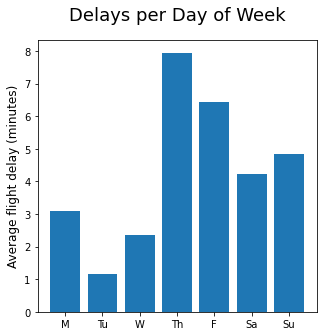

In [10]:
# Plot weekday average delay

x = weekday_mean.weekday
y = weekday_mean.avg_arr_delay

fig, ax = plt.subplots( figsize = (5,5))

ax.bar(x,y)
ax.set_ylabel('Average flight delay (minutes)', fontsize=12)
ax.set_xlabel('', fontsize=12)
ax.set_title('Delays per Day of Week', fontsize=18, y=1.05)

plt.show()

In [11]:
# Caluculate median flight delay per week

weekday_med = df[['weekday', 'arr_delay']]
weekday_med = weekday_med.groupby(['weekday'], as_index=False).median()
weekday_med=weekday_med.rename(columns={'arr_delay': 'median_arr_delay'})
weekday_med=weekday_med.replace({0: 'M', 1:'Tu',2:'W',3:'Th',4:'F',5:'Sa',6:'Su'})
weekday_med

,weekday,median_arr_delay
0,M,-7.0
1,Tu,-8.0
2,W,-6.0
3,Th,-5.0
4,F,-5.0
5,Sa,-6.0
6,Su,-6.0


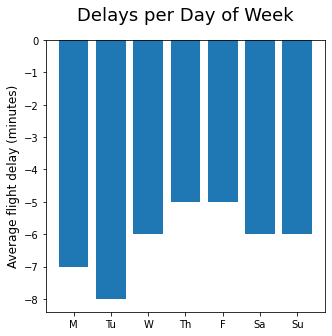

In [12]:
# Plot weekday median

x = weekday_med.weekday
y = weekday_med.median_arr_delay

fig, ax = plt.subplots( figsize = (5,5))

ax.bar(x,y)
ax.set_ylabel('Average flight delay (minutes)', fontsize=12)
ax.set_xlabel('', fontsize=12)
ax.set_title('Delays per Day of Week', fontsize=18, y=1.05)

plt.show()

Interesting - Looks Like theres different factors comming into play here - will plot together... must be a number of outliers affecting the mean.  There is definitely a difference in day of week, but can't use hypotheisis that weekends are different than weekdays.

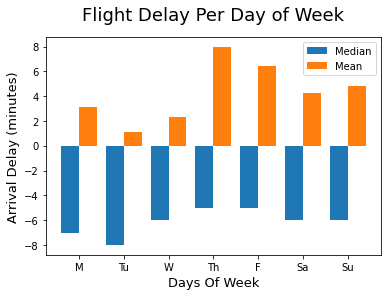

In [91]:
# Plot both measures together

X = weekday_mean.weekday
y_med = weekday_med.median_arr_delay
y_mean = weekday_mean.avg_arr_delay
  
X_axis = np.arange(len(X))
 
   
plt.bar(X_axis - 0.2, y_med, 0.4, label = 'Median')
plt.bar(X_axis + 0.2, y_mean, 0.4, label = 'Mean')
  
plt.xticks(X_axis, X)
plt.xlabel("Days Of Week" ,fontsize=13)
plt.ylabel("Arrival Delay (minutes)" ,fontsize=13)
plt.title("Flight Delay Per Day of Week",fontsize=18, y=1.05)
plt.legend()
plt.show()


#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

In [14]:
# We evaluate this in the exploratory analysis2 and in the feature engineering parts - we did pull the weather data 
# but only for once a day.  Since we sampled the data for the time around the test time, some weather impacts should be 
# modelled. We are also including average weather delay per airport.

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

In [7]:
# Parse hour per day (midnight == 0, 11:35pm == 23)

def split_time_of_day_departure(df):
    """ takes estimated time of departure and splits in to hours 24 hour clock (local time) """
    df['dep_hour'] = df['crs_dep_time']
    df['dep_hour'] = np.floor(df['dep_hour']/100).astype("int")
    return df
df = split_time_of_day_departure(df)

def split_time_of_day_arrival(df):
    """ takes estimated time of arrival and splits in to hours 24 hour clock (local time) """
    df['arr_hour'] = df['crs_arr_time']
    df['arr_hour'] = np.floor(df['arr_hour']/100).astype("int")
    return df
df = split_time_of_day_arrival(df)


In [22]:
# DEPARTURE TAXI OUT
df_taxi_out = df[['origin', 'taxi_in','dep_hour', 'dest', 'taxi_out', 'arr_hour']]
df_taxi_out = df_taxi_out[['origin','dep_hour','taxi_out']].groupby(['origin','dep_hour'], as_index=False).mean().sort_values(['origin','dep_hour'], ascending = True)

# # OF FLIGHTS PER HOUR - (both in and out)
df_flights = df[['origin', 'origin_city_name','dep_hour', 'dest', 'arr_hour']]
df_flights = df_flights[['origin','dep_hour','origin_city_name']].groupby(['origin','dep_hour'], as_index=False).count().sort_values(['origin','dep_hour'], ascending = True)
# df_flights

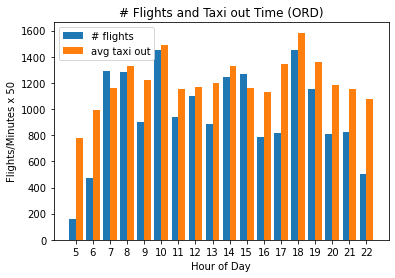

In [23]:
# plot #flights/ hour against avg flight per hour for a few top airports 

# FOR ORD
df_taxi_ord = df_taxi_out[df_taxi_out['origin'] == 'ORD']
df_flights_ord = df_flights[df_flights['origin'] == 'ORD']

X = df_taxi_ord.dep_hour
y1 = df_flights_ord.origin_city_name  # this is now actually the flight count 
y2 = df_taxi_ord.taxi_out * 50# this is the average 

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, y1, 0.4, label = '# flights')
plt.bar(X_axis + 0.2, y2, 0.4, label = 'avg taxi out')
  
plt.xticks(X_axis, X)
plt.xlabel("Hour of Day")
plt.ylabel("Flights/Minutes x 50")
plt.title("# Flights and Taxi out Time (ORD)")
plt.legend()
plt.show()

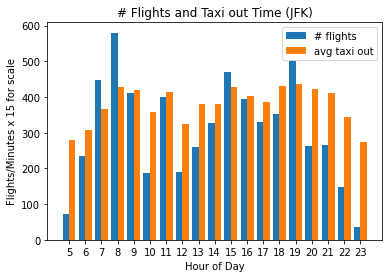

In [24]:
# FOR JFK

df_taxi_jfk = df_taxi_out[df_taxi_out['origin'] == 'JFK']
df_flights_jfk = df_flights[df_flights['origin'] == 'JFK']

X = df_taxi_jfk.dep_hour
y1 = df_flights_jfk.origin_city_name  # this is now actually the count should rename
y2 = df_taxi_jfk.taxi_out* 15 # this is tge average should rename '

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, y1, 0.4, label = '# flights')
plt.bar(X_axis + 0.2, y2, 0.4, label = 'avg taxi out')
  
plt.xticks(X_axis, X)
plt.xlabel("Hour of Day")
plt.ylabel("Flights/Minutes x 15 for scale")
plt.title("# Flights and Taxi out Time (JFK)")
plt.legend()
plt.show()

In [31]:
# ARRIVAL TAXI IN
df_taxi_in= df[['taxi_in', 'dest', 'arr_hour']]
df_taxi_in = df_taxi_in[['dest','arr_hour','taxi_in']].groupby(['dest','arr_hour'], as_index=False).mean().sort_values(['dest','arr_hour'], ascending = True)

# # # OF FLIGHTS PER HOUR - (both in and out)
df_flights_in= df[['taxi_in', 'dest', 'arr_hour']]
df_flights_in = df_flights_in[['dest','arr_hour','taxi_in']].groupby(['dest','arr_hour'], as_index=False).count().sort_values(['dest','arr_hour'], ascending = True)
df_flights_in = df_flights_in.rename(columns={'taxi_in': "num_flights"})


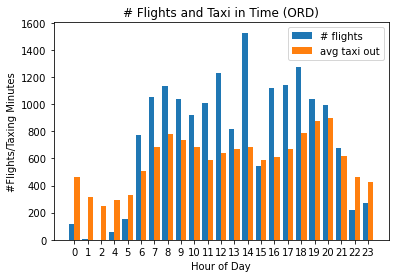

In [32]:
# plot #flights/ hour against avg flight per hour for a few top airports 

# FOR ORD
df_taxi_ord = df_taxi_in[df_taxi_in['dest'] == 'ORD']
df_flights_ord = df_flights_in[df_flights_in['dest'] == 'ORD']

X = df_taxi_ord.arr_hour
y1 = df_flights_ord.num_flights  
y2 = df_taxi_ord.taxi_in *50# this is the average in minutes

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, y1, 0.4, label = '# flights')
plt.bar(X_axis + 0.2, y2, 0.4, label = 'avg taxi out')
  
plt.xticks(X_axis, X)
plt.xlabel("Hour of Day")
plt.ylabel("#Flights/Taxing Minutes")
plt.title("# Flights and Taxi in Time (ORD)")
plt.legend()
plt.show()

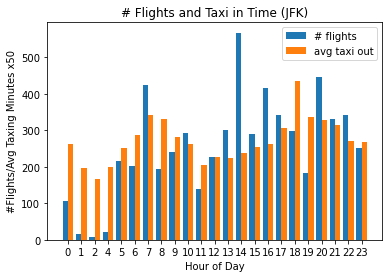

In [35]:
# FOR ORD
df_taxi_ord = df_taxi_in[df_taxi_in['dest'] == 'JFK']
df_flights_ord = df_flights_in[df_flights_in['dest'] == 'JFK']

X = df_taxi_ord.arr_hour
y1 = df_flights_ord.num_flights  # this is the flight count 
y2 = df_taxi_ord.taxi_in  *30# this is  average 

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, y1, 0.4, label = '# flights')
plt.bar(X_axis + 0.2, y2, 0.4, label = 'avg taxi out')
  
plt.xticks(X_axis, X)
plt.xlabel("Hour of Day")
plt.ylabel("#Flights/Avg Taxing Minutes x50")
plt.title("# Flights and Taxi in Time (JFK)")
plt.legend()
plt.show()

The plots above were difficult to tell - we know that some aiports have longer taxiing time 
and accounted for by flight times (ie it take 45min to fly to new york from ottawa but flight time is 1.5 hours). 
There is a variation of times throughout the day - and taxiing times *somewhat linked to 
airport traffic - will keep arr time and dep time in feature space


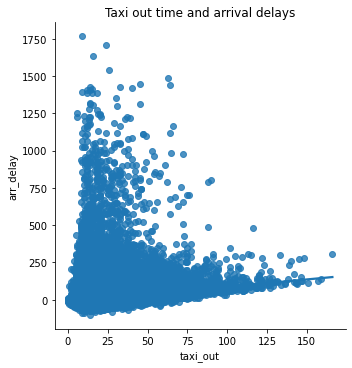

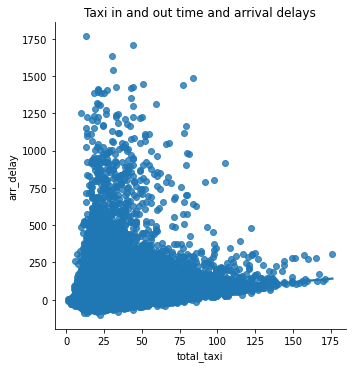

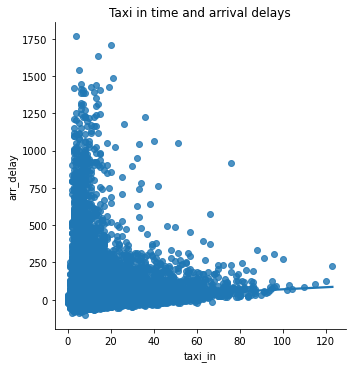

In [27]:

# The plot below is not telling about the relationship.  

# Try taxi-time out vs delay
ax =sns.lmplot(x='taxi_out', y='arr_delay', data = df)
ax.set(title='Taxi out time and arrival delays')
plt.show()

df['total_taxi'] = df.taxi_in + df.taxi_out
ax =sns.lmplot(x='total_taxi', y='arr_delay', data = df)
ax.set(title='Taxi in and out time and arrival delays')
plt.show()

# df['total_taxi'] = df.taxi_in + df.taxi_out
ax =sns.lmplot(x='taxi_in', y='arr_delay', data = df)
ax.set(title='Taxi in time and arrival delays')
plt.show()

#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

In [411]:
# Departure delays are in the'dep_delay' column

# delayed have positive delay values
total_delayed = df[df['arr_delay'] >0].copy()

# calculate percentage of departure delays from total delays
percentage_dep_delay = total_delayed[total_delayed['dep_delay'] > 0].count()/total_delayed['dep_delay'].count()
print(" Percentage of flights delayed before departure is {:.2%}".format(percentage_dep_delay['dep_time']))

 Percentage of flights delayed before departure is 73.64%


In [412]:
# Find diff of dep delay vs arr delay 

total_delayed['delay_diff'] = total_delayed.dep_delay - total_delayed.arr_delay # if this value is negative, then reduced delay in air
total_delayed['delay_diff'].mean()
total_delayed['delay_diff'].median()
print(f"Mean difference between departure delay and arrival delay is {total_delayed['delay_diff'].mean():.2} minutes and median is {total_delayed['delay_diff'].median()} minutes, but/since airlines are able to have negative values indicating they are able to make up time during flights" )

Mean difference between departure delay and arrival delay is -2.6 minutes and median is -2.0 minutes, but/since airlines are able to have negative values indicating they are able to make up time during flights


#### **Task 6**: How many states cover 50% of US air traffic? 

In [36]:
# Split city_state column into separate States and Cities columns

def split_dest_city_state(df):
    """ separates destination city and states into own columns"""
    df['dest_state'] = df['dest_city_name']
    df['dest_city'] = df['dest_city_name']
    
    f_state= lambda x: x.split(sep=', ')[1]
    f_city= lambda x: x.split(sep=', ')[0]

    df['dest_state'] = df['dest_state'].apply(f_state)
    df['dest_city'] = df['dest_city'].apply(f_city)
    return df

def split_origin_city_state(df):
    """ separates origin city and states into own columns"""
    df['origin_state'] = df['origin_city_name']
    df['origin_city'] = df['origin_city_name']
    
    f_state= lambda x: x.split(sep=', ')[1]
    f_city= lambda x: x.split(sep=', ')[0]

    df['origin_state'] = df['origin_state'].apply(f_state)
    df['origin_city'] = df['origin_city'].apply(f_city)
    return df

df = split_dest_city_state(df)
df = split_origin_city_state(df)


In [37]:
# Calculate Flight Counts per State

# note "no_name" is a placeholder to perform count()
state_count_orig = df[['origin_state', 'fl_date']].groupby('origin_state', as_index=False).count().sort_values(by='fl_date')
state_count_dest = df[['dest_state', 'fl_date']].groupby('dest_state', as_index=False).count().sort_values(by='fl_date')
state_count= state_count_orig.merge(state_count_dest, left_on='origin_state', right_on='dest_state')

state_count['total_flights'] = state_count['fl_date_x']+state_count['fl_date_y']
state_count.rename(columns = {'origin_state': 'state'}, inplace=True)
state_count.drop(['fl_date_x', 'dest_state', 'fl_date_y'], axis=1, inplace=True)

state_count= state_count.sort_values(by='total_flights', ascending=False)


In [38]:
# Calculate how many states account for 50% of all traffic in USA

state_list = list(state_count.state)
flight_count_list = list(state_count.total_flights)

total_flights = state_count.total_flights.sum()
total_flights

top_state=[]
flight_counts=0
i=0
while flight_counts < total_flights/2:
    top_state.append(state_list[i])

    flight_counts += flight_count_list[i]
    i+=1


print("Number of top trafficed states accounting for 50% of traffic: ", len(top_state))
top_state


Number of top trafficed states accounting for 50% of traffic:  7


['CA', 'TX', 'FL', 'IL', 'GA', 'NY', 'NC']

#### get top 10 states for feature engineering

In [39]:
top10states = state_count.state.head(10)
keys = top10states 
values = range(10,0,-1)
data = dict(zip(keys, values))
#  this was used for the initial binning (placed top states in order of most flights seen and rest in the 0 bin ('rest'))

In [40]:
data

{'CA': 10,
 'TX': 9,
 'FL': 8,
 'IL': 7,
 'GA': 6,
 'NY': 5,
 'NC': 4,
 'CO': 3,
 'PA': 2,
 'WA': 1}

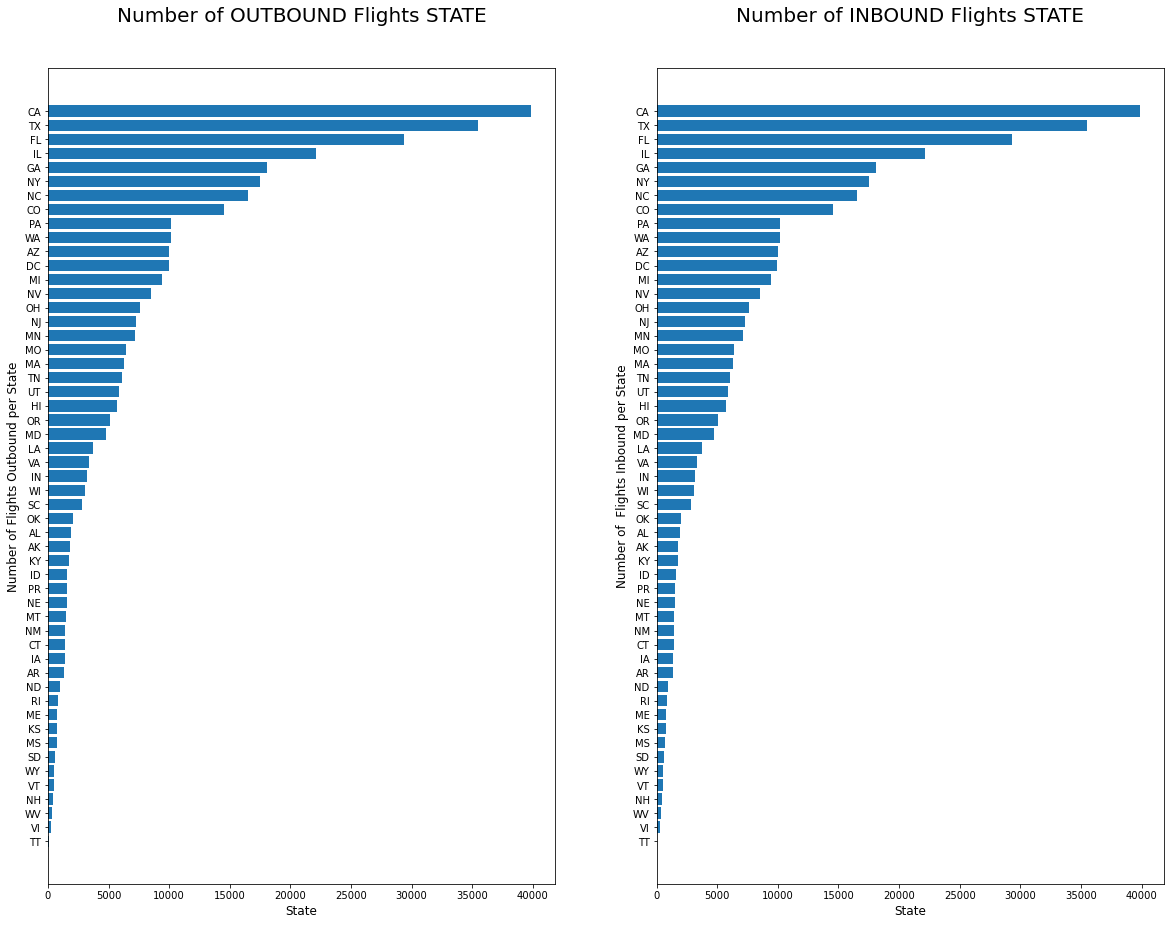

In [46]:
#  Plot number of flights per state

# import matplotlib
import matplotlib.pyplot as plt

x1 = state_count_orig['origin_state']
x2 = state_count_dest['dest_state']

y1 = state_count_orig['fl_date']
y2 = state_count_dest['fl_date']

fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize = (20,15))

ax1.barh(x1,y1)
ax1.set_ylabel('Number of Flights Outbound per State', fontsize=12)
ax1.set_xlabel('State', fontsize=12)
ax1.set_title('Number of OUTBOUND Flights STATE', fontsize=20, y=1.05)

ax2.barh(x2,y2)
ax2.set_ylabel('Number of  Flights Inbound per State', fontsize=12)
ax2.set_xlabel('State', fontsize=12)
ax2.set_title('Number of INBOUND Flights STATE', fontsize=20, y=1.05)
# add legend

plt.show()

# use quantile - qcut to bin states

#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

In [413]:
# As seen in above question - aircraft are on average able to make up time in the air (aka go faster)

#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

In [414]:
# CREATE HOUR OF DAY AND HAUL TYPE COLUMNS

def split_time_of_day_departure(df):
    """ takes estimated time of departure and splits in to hours 24 hour clock (local time) """
    df['dep_hour'] = df['crs_dep_time']
    df['dep_hour'] = np.floor(df['dep_hour']/100).astype("int")
    return df
  
def create_haul_type(df):
    """ adds short:0, mid:1, long:2 range haul types from crs_elapsed_time (scheduled) """

    df["haul_type"] = df['crs_elapsed_time']
    df["haul_type"].mask(df["haul_type"].values < 180, 0, inplace=True)
    df["haul_type"].mask((df["haul_type"] >= 180) & (df["haul_type"] < 360), 1, inplace=True)
    df["haul_type"].mask((df["haul_type"] >= 360), 2, inplace=True) 
    df["haul_type"]= df["haul_type"].astype('int')
    return df  

df = split_time_of_day_departure(df)
df = create_haul_type(df)
df.haul_type.unique()


array([1, 0, 2])

In [415]:
# want departure time for each category - SPLIT APART

df_haul_type = df[['haul_type', 'dep_hour', 'index']]
df_haul_type = df_haul_type.groupby(['dep_hour','haul_type'], as_index=False).count()

short_haul = df_haul_type[df_haul_type.haul_type == 0]
med_haul = df_haul_type[df_haul_type.haul_type == 1]
long_haul = df_haul_type[df_haul_type.haul_type == 2]

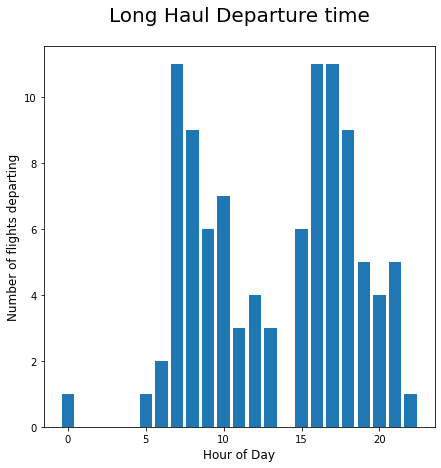

In [416]:
# Plot each type to visualize distribution

import matplotlib.pyplot as plt
# Long Haul Plot (6+ hour long flight)

x = long_haul.dep_hour
y = long_haul['index']

fig, ax = plt.subplots( figsize = (7,7))

ax.bar(x,y)
ax.set_ylabel('Number of flights departing', fontsize=12)
ax.set_xlabel('Hour of Day', fontsize=12)
ax.set_title('Long Haul Departure time', fontsize=20, y=1.05)

plt.show()

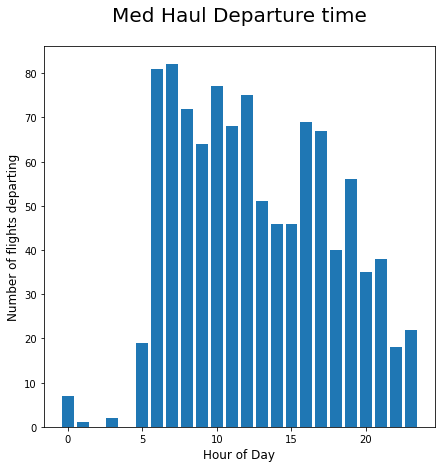

In [417]:
# Med Haul Plot (3-6 hour long flight)

x = med_haul.dep_hour
y = med_haul['index']

fig, ax = plt.subplots( figsize = (7,7))

ax.bar(x,y)
ax.set_ylabel('Number of flights departing', fontsize=12)
ax.set_xlabel('Hour of Day', fontsize=12)
ax.set_title('Med Haul Departure time', fontsize=20, y=1.05)

plt.show()

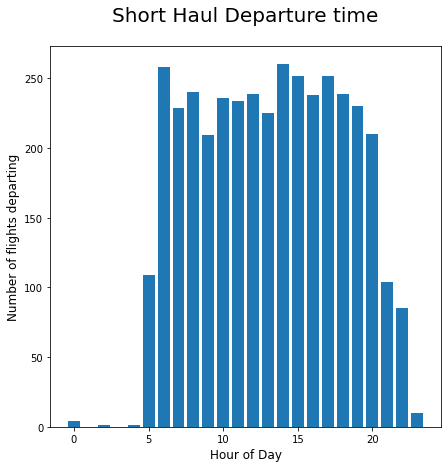

In [418]:
# short Haul Plot (under 1 hour flight)

x = short_haul.dep_hour
y = short_haul['index']

fig, ax = plt.subplots( figsize = (7,7))

ax.bar(x,y)
ax.set_ylabel('Number of flights departing', fontsize=12)
ax.set_xlabel('Hour of Day', fontsize=12)
ax.set_title('Short Haul Departure time', fontsize=20, y=1.05)

plt.show()

Looks like short haul more uniformly distributed, med haul declines slowly throughout day
and long haul is binomially split - which all make sense intuitively.

#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

In [50]:
# CALCULATE FLIGHT COUNTS PER AIRPORTS
airport_count_orig = df[['origin', 'fl_date']].groupby('origin', as_index=False).count().sort_values(by='fl_date', ascending = False)
airport_count_dest = df[['dest', 'fl_date']].groupby('dest', as_index=False).count().sort_values(by='fl_date')
airport_count= airport_count_orig.merge(airport_count_dest, left_on='origin', right_on='dest')
airport_count
airport_count['total_flights'] = airport_count['fl_date_x']+airport_count['fl_date_y']
airport_count.rename(columns = {'origin': 'airport_code'}, inplace=True)
airport_count.drop(['fl_date_x', 'dest', 'fl_date_y'], axis=1, inplace=True)
airport_count.head()


,airport_code,total_flights
0,ORD,34676
1,ATL,33883
2,DFW,26125
3,DEN,24459
4,LAX,23397


In [51]:
df.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime', 'no_name', 'weekday', 'dep_hour', 'arr_hour',
       'dest_state', 'dest_city', 'origin_state', 'origin_city'],
      dtype='object')

In [52]:
# Calculate 10 to busiest in terms of number of flights

top_airport_counts = airport_count.sort_values(by='total_flights', ascending=False).head(10)
top_airport_counts

,airport_code,total_flights
0,ORD,34676
1,ATL,33883
2,DFW,26125
3,DEN,24459
4,LAX,23397
5,CLT,23045
6,PHX,17126
7,SEA,16880
8,IAH,16430
9,SFO,16230


In [53]:
# get airport list for feature engineering

keys = top_airport_counts.airport_code 
values = range(10,0,-1)
data = dict(zip(keys, values))
data

{'ORD': 10,
 'ATL': 9,
 'DFW': 8,
 'DEN': 7,
 'LAX': 6,
 'CLT': 5,
 'PHX': 4,
 'SEA': 3,
 'IAH': 2,
 'SFO': 1}

In [54]:
# Calculate how much traffic these 10 airports account for: 

percent_traffic = top_airport_counts.total_flights.sum()/airport_count.total_flights.sum()
percent_traffic

print(f''' The top 10 airports account for {percent_traffic:.2%} of the flight traffic from {airport_count.airport_code.count()} airports.''')

 The top 10 airports account for 32.62% of the flight traffic from 360 airports.


In [55]:
# bin airport counts for feature engineering

def column_count(df, col_name):
    df.col_name
    
def make_bin_column(df, col_name, n_bin_range):
    '''
    Convert a numeric column to a categorical ordinal column.
    Assumption: the column that is going to be binned
    must be positive numeric numbers
    input:
      - df: data frame
      - col_name: column in string
      - n_bin_range: number of bin required
    return: a data frame with the newly binned column  
    '''
    # make bins and bin labels
    bin_ranges = np.linspace(0, df[col_name].max(), n_bin_range+1)
    bin_names = range(1, n_bin_range+1)
    
    # perform the binning
    new_col_name = col_name + '_bin'
    df[new_col_name] = pd.cut(np.array(df[col_name]), 
                              bins=bin_ranges, 
                              labels=bin_names)
    return df

In [56]:
airport_count = make_bin_column(airport_count, 'total_flights', 5)

In [68]:
airport_count.head()

,airport_code,total_flights,total_flights_bin
0,ORD,34676,5
1,ATL,33883,5
2,DFW,26125,4
3,DEN,24459,4
4,LAX,23397,4


In [58]:
# Add the number of flights bins to the dataframe

# # merge the encoding with origin airport
merge_airport_count = airport_count.copy()
merge_airport_count.rename(columns={'airport_code': 'origin'}, inplace=True)
merge_airport_count.rename(columns={'total_flights_bin': 'origin_total_flights_bin'}, inplace=True)
df = df.merge(merge_airport_count, on='origin')
df.drop(columns='total_flights', axis=1, inplace=True)

# merge the encoding with destination airport
merge_airport_count.rename(columns={'origin': 'dest'}, inplace=True)
merge_airport_count.rename(columns={'origin_total_flights_bin': 'dest_total_flights_bin'}, inplace=True)
df = df.merge(merge_airport_count, on='dest')
df.drop(columns='total_flights', axis=1, inplace=True)


In [59]:
top_airport_counts.airport_code

0    ORD
1    ATL
2    DFW
3    DEN
4    LAX
5    CLT
6    PHX
7    SEA
8    IAH
9    SFO
Name: airport_code, dtype: object

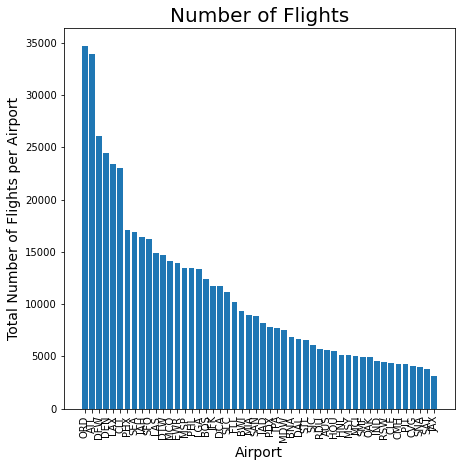

In [60]:
# plot airport flight volume

import matplotlib.pyplot as plt
top_airport_counts = airport_count.sort_values(by='total_flights', ascending=False).head(50)
x = top_airport_counts.airport_code

y = top_airport_counts.total_flights

fig, ax = plt.subplots( figsize = (7,7))

ax.bar(x,y)
ax.set_ylabel('Total Number of Flights per Airport', fontsize=14)
ax.set_xlabel('Airport', fontsize=14)
ax.set_title('Number of Flights', fontsize=20, y=1)
plt.xticks(rotation=90)
plt.show()

# Can split into 6 teirs as well or qcut

### Extra Task - see impact of airport size and delay

In [61]:
# ADD Number of flights TO DF (for plotting below)

# # merge the encoding with origin airport
merge_airport_count = airport_count.copy()
merge_airport_count.rename(columns={'airport_code': 'origin'}, inplace=True)
merge_airport_count.rename(columns={'total_flights_bin': 'origin_total_flights_bin', 'total_flights': 'origin_total_flights'}, inplace=True)
df = df.merge(merge_airport_count, on='origin')
# df.drop(columns='total_flights', axis=1, inplace=True)

# merge the encoding with destination airport
merge_airport_count.rename(columns={'origin': 'dest'}, inplace=True)
merge_airport_count.rename(columns={'origin_total_flights_bin': 'dest_total_flights_bin', 'origin_total_flights': 'dest_total_flights'}, inplace=True)
df = df.merge(merge_airport_count, on='dest')
# df.drop(columns='total_flights', axis=1, inplace=True)


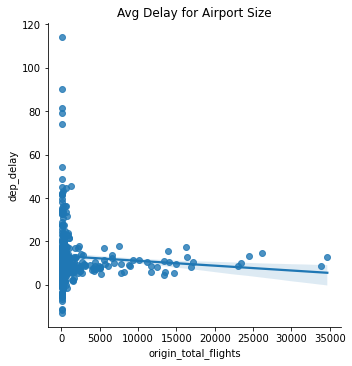

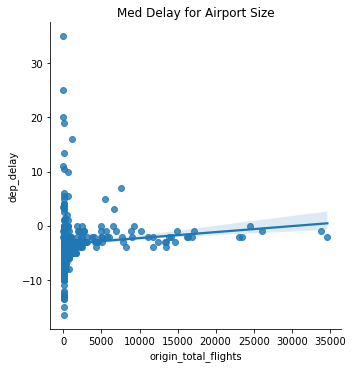

In [62]:
# Plot departure delays based on size of origin airport

delays_origin =df[['origin','dep_delay','origin_total_flights']]
delays_origin_mean = delays_origin.groupby('origin', as_index=False).mean()
delays_origin_median = delays_origin.groupby('origin', as_index=False).median()

ax =sns.lmplot(x='origin_total_flights', y='dep_delay', data = delays_origin_mean)
ax.set(title='Avg Delay for Airport Size')
plt.show()

ax =sns.lmplot(x='origin_total_flights', y='dep_delay', data = delays_origin_median)
ax.set(title='Med Delay for Airport Size')
plt.show()

# NOTE: The following are just showing law of large numbers - need to ensure enough data samples for each

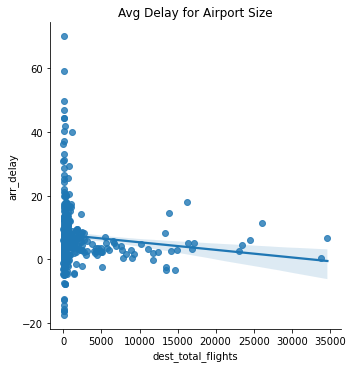

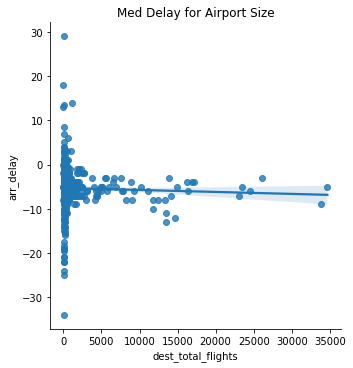

In [63]:
# Plot arrival delays based on busyness of destination airport

delays_dest =df[['dest','arr_delay', 'dest_total_flights']]
delays_dest_mean = delays_dest.groupby('dest', as_index=False).mean()
delays_dest_median = delays_dest.groupby('dest', as_index=False).median()

ax =sns.lmplot(x='dest_total_flights', y='arr_delay', data = delays_dest_mean)
ax.set(title='Avg Delay for Airport Size')
plt.show()

ax =sns.lmplot(x='dest_total_flights', y='arr_delay', data = delays_dest_median)
ax.set(title='Med Delay for Airport Size')
plt.show()

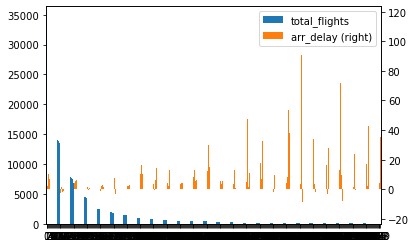

In [64]:
# Plot airport size (flights and arrival delay)

# average
plot_airpot_delays = df[['origin', 'arr_delay']]
 
plot_airpot_delays =plot_airpot_delays.groupby(['origin'], as_index=False).mean()
plot_airpot_delays =  airport_count.merge(plot_airpot_delays, right_on='origin', left_on='airport_code')
plot_airpot_delays = plot_airpot_delays.rename({'arr_delay': 'avg_arr_delay'})

# plot
plot_x=plot_airpot_delays[['airport_code','total_flights','arr_delay']]

plot_x.plot( kind= 'bar' , secondary_y= 'arr_delay' , rot= 0 )
plt.show()

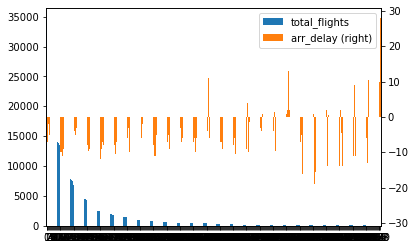

In [65]:
# median
plot_airpot_delays = df[['origin', 'arr_delay']]
 
plot_airpot_delays =plot_airpot_delays.groupby(['origin'], as_index=False).median()
plot_airpot_delays =  airport_count.merge(plot_airpot_delays, right_on='origin', left_on='airport_code')
plot_airpot_delays = plot_airpot_delays.rename({'arr_delay': 'median_arr_delay'})

# plot
plot_x=plot_airpot_delays[['airport_code','total_flights','arr_delay']]

plot_x.plot( kind= 'bar' , secondary_y= 'arr_delay' , rot= 0 )
plt.show()

# This makes sense - law of large numbers

### Passengers for airports

In [66]:
# Load in data set for passengers - monthly so take from January
passengers = pd.read_csv('../data/passengers_january.csv')

In [67]:
# NOTE: This is not directly related to the number of flights as this is for the MONTH ofJanuary and flights for the first 
# week of January and 5 days previous and 5 days following

# FLIGHTS OUT
passengers[['origin', 'passengers', 'aircraft_type', 'dest']]
passenger_count_out = passengers[['origin', 'passengers']].groupby('origin', as_index = False).count().sort_values("passengers", ascending = False)
passenger_count_out = passenger_count_out.rename(columns={'passengers':'outbound_passengers'})

# FLIGHTS IN
passengers[['origin', 'passengers', 'aircraft_type', 'dest']]
passenger_count_in = passengers[['dest', 'passengers']].groupby('dest', as_index = False).count().sort_values("passengers", ascending = False)
passenger_count_in = passenger_count_in.rename(columns={'passengers':'inbound_passengers'})
passenger_count_in

,dest,inbound_passengers
833,ORD,2643
77,ATL,2105
293,DEN,1910
635,LAX,1821
517,IAH,1548
...,...,...
478,HKD,1
1096,SYA,1
476,HIO,1
475,HIK,1


In [71]:
airport_count_pass = airport_count.merge(passenger_count_in, left_on='airport_code', right_on='dest', how = 'left')
airport_count_pass = airport_count_pass.merge(passenger_count_out, left_on='airport_code', right_on='origin', how = 'left')
airport_count_pass = airport_count_pass[['airport_code','total_flights','total_flights_bin', 'inbound_passengers','outbound_passengers']]

# NOTE: only doing outbound passengers for now as most delays happen before leaving (and inbound/ outbound similar)- look into this more after
# airport_count_pass['passenger_total_flight_ratio'] = airport_count_pass.outbound_passengers / airport_count_pass.total_flights
airport_count_pass.head(20)

# INTERESTING - Seems rankings for airport for netoriously bad service or delays have higher passenger number ranking than
# flights ranking - also some of these are hubs - would like to include some of this information 

,airport_code,total_flights,total_flights_bin,inbound_passengers,outbound_passengers
0,ORD,34676,5,2643,2681
1,ATL,33883,5,2105,2125
2,DFW,26125,4,1446,1477
3,DEN,24459,4,1910,1918
4,LAX,23397,4,1821,1864
5,CLT,23045,4,1189,1213
6,PHX,17126,3,1091,1090
7,SEA,16880,3,1094,1112
8,IAH,16430,3,1548,1518
9,SFO,16230,3,1190,1179


In [72]:
delays_pass = delays_dest.groupby('dest', as_index = False).mean()

airport_count_pass_delay =  airport_count_pass.merge(delays_pass, left_on='airport_code', right_on='dest', how = 'left')
airport_count_pass_delay.sort_values("dest_total_flights", ascending = False).head(50)
airport_count_pass_delay['passenger_destTotalFlight_ratio'] = airport_count_pass_delay.outbound_passengers / airport_count_pass_delay.dest_total_flights
airport_count_pass_delay_top = airport_count_pass_delay.head(50)
airport_count_pass_delay_top.sort_values('arr_delay', ascending =False).head()

# It would be interesting to include this metric to the airport locations
# Need to remove outliers and come back and investigate this

,airport_code,total_flights,total_flights_bin,inbound_passengers,outbound_passengers,dest,arr_delay,dest_total_flights,passenger_destTotalFlight_ratio
9,SFO,16230,3,1190,1179,SFO,18.043657,16230.0,0.072643
13,EWR,13938,3,1445,1463,EWR,14.713458,13938.0,0.104965
2,DFW,26125,4,1446,1477,DFW,11.334956,26125.0,0.056536
16,LGA,13399,2,650,648,LGA,8.181421,13399.0,0.048362
35,HOU,5529,1,314,312,HOU,6.929619,5529.0,0.056430


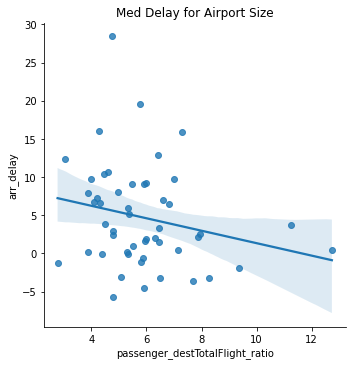

In [358]:
#
ax =sns.lmplot(x='passenger_destTotalFlight_ratio', y='arr_delay', data = airport_count_pass_delay_top)
ax.set(title='Median Arrival Delay for Airport ()')
plt.show()

#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?

In [ ]:
# This does make sense if aircraft go faster to make up time in air - will come back to if time at end

#### Extra Task: Cities 

In [74]:
# CALCULATE FLIGHT COUNTS CITY  - run Task 6 first to split out city columns

# GET CITY AND FLIGHTS
city_count_orig = df[['origin_city', 'fl_date']].groupby('origin_city', as_index=False).count().sort_values(by='fl_date')
city_count_dest = df[['dest_city', 'fl_date']].groupby('dest_city', as_index=False).count().sort_values(by='fl_date')
city_count= city_count_orig.merge(city_count_dest, left_on='origin_city', right_on='dest_city')

city_count['total_flights'] = city_count['fl_date_x']+city_count['fl_date_y']
city_count.rename(columns = {'origin_city': 'city'}, inplace=True)
city_count.drop(['fl_date_x', 'dest_city', 'fl_date_y'], axis=1, inplace=True)

city_count= city_count.sort_values(by='total_flights', ascending=False)
city_count

,city,total_flights
345,Chicago,42229
344,Atlanta,33883
343,Dallas/Fort Worth,26125
342,New York,25138
341,Denver,24459
...,...,...
4,Hagerstown,16
2,Owensboro,12
3,Pago Pago,12
1,Ogden,10


In [75]:
city_count.columns

Index(['city', 'total_flights'], dtype='object')

In [77]:
# Get top 50% city air traffic
city_list = list(city_count.city)
flight_count_list = list(city_count.total_flights)

total_flights = city_count.total_flights.sum()
total_flights

top_city=[]
flight_counts=0
i=0
while flight_counts < total_flights/2:
    top_city.append(city_list[i])

    flight_counts += flight_count_list[i]
    i+=1


print("Number of top trafficed states accounting for 50% of traffic: ", len(top_city))
top_city


Number of top trafficed states accounting for 50% of traffic:  17


['Chicago',
 'Atlanta',
 'Dallas/Fort Worth',
 'New York',
 'Denver',
 'Los Angeles',
 'Charlotte',
 'Houston',
 'Washington',
 'Phoenix',
 'Seattle',
 'San Francisco',
 'Las Vegas',
 'Detroit',
 'Orlando',
 'Newark',
 'Minneapolis']

In [392]:
# GET TO CITIES FOR ML
top10cities = city_count.city.head(10)
keys = top10cities 
values = range(10,0,-1)
data = dict(zip(keys, values))
data

{'Chicago': 10,
 'Atlanta': 9,
 'New York': 8,
 'Dallas/Fort Worth': 7,
 'Denver': 6,
 'Charlotte': 5,
 'Houston': 4,
 'Washington': 3,
 'Los Angeles': 2,
 'Seattle': 1}

In [159]:
# GET CITY AND DELAYS
city_delay_dest_med = df[['dest_city', 'arr_delay']].groupby('dest_city', as_index=False).median().sort_values(by='arr_delay')
city_delay_dest_mean = df[['dest_city', 'arr_delay']].groupby('dest_city', as_index=False).mean().sort_values(by='arr_delay')

city_delay_dest_mean

,dest_city,arr_delay
116,La Crosse,-35.000000
90,Hays,-29.000000
0,Aberdeen,-26.000000
63,Elmira/Corning,-26.000000
124,Lihue,-25.333333
...,...,...
86,Harlingen/San Benito,55.500000
68,Fayetteville,56.933333
219,Trenton,64.333333
169,Peoria,72.000000


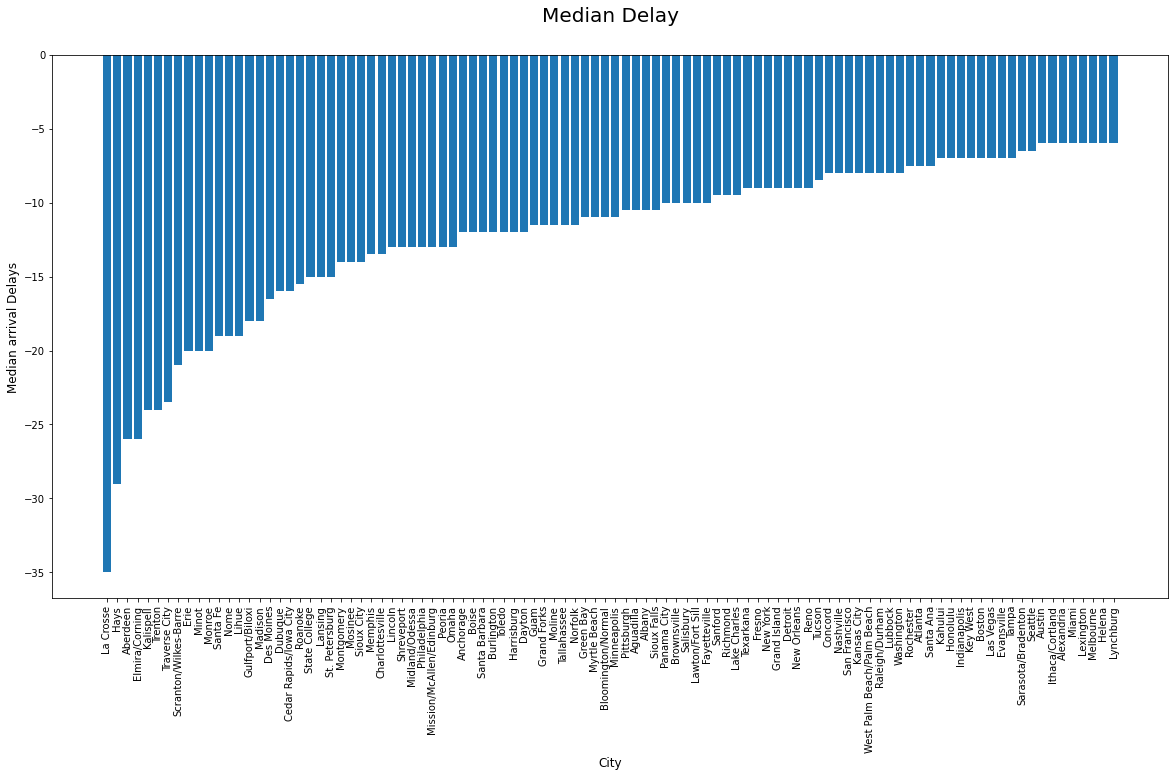

In [165]:
# PLOT CITY /delay (least median)
most_city_delays= city_delay_dest_med.head(100)
import matplotlib.pyplot as plt

x = most_city_delays.dest_city
y = most_city_delays.arr_delay

fig, ax = plt.subplots( figsize = (20,10))

ax.bar(x,y)
ax.set_ylabel('Median arrival Delays', fontsize=12)
ax.set_xlabel('City', fontsize=12)
ax.set_title('Median Delay', fontsize=20, y=1.05)
plt.xticks(rotation = 90)
plt.show()



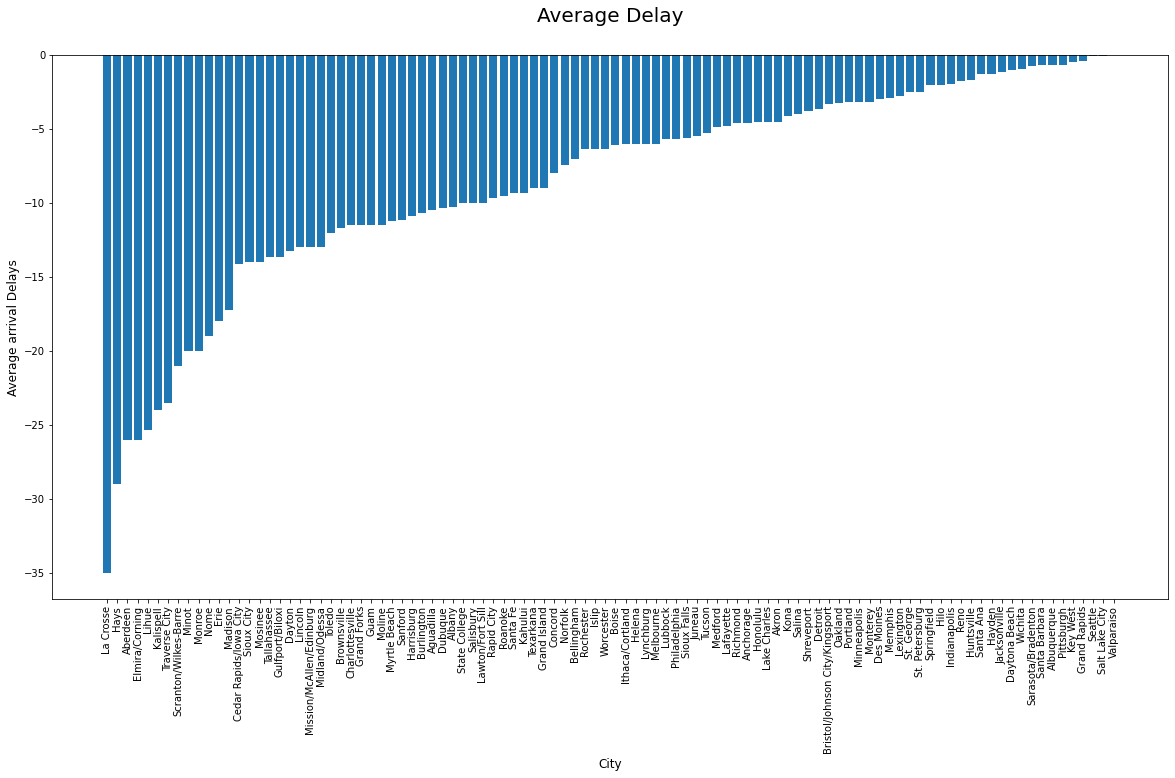

In [169]:
# PLOT CITY /delay (least mean)
city_delays= city_delay_dest_mean.head(100)
import matplotlib.pyplot as plt

x = city_delays.dest_city
y = city_delays.arr_delay

fig, ax = plt.subplots( figsize = (20,10))

ax.bar(x,y)
ax.set_ylabel('Average arrival Delays', fontsize=12)
ax.set_xlabel('City', fontsize=12)
ax.set_title('Average Delay', fontsize=20, y=1.05)
plt.xticks(rotation = 90)
plt.show()

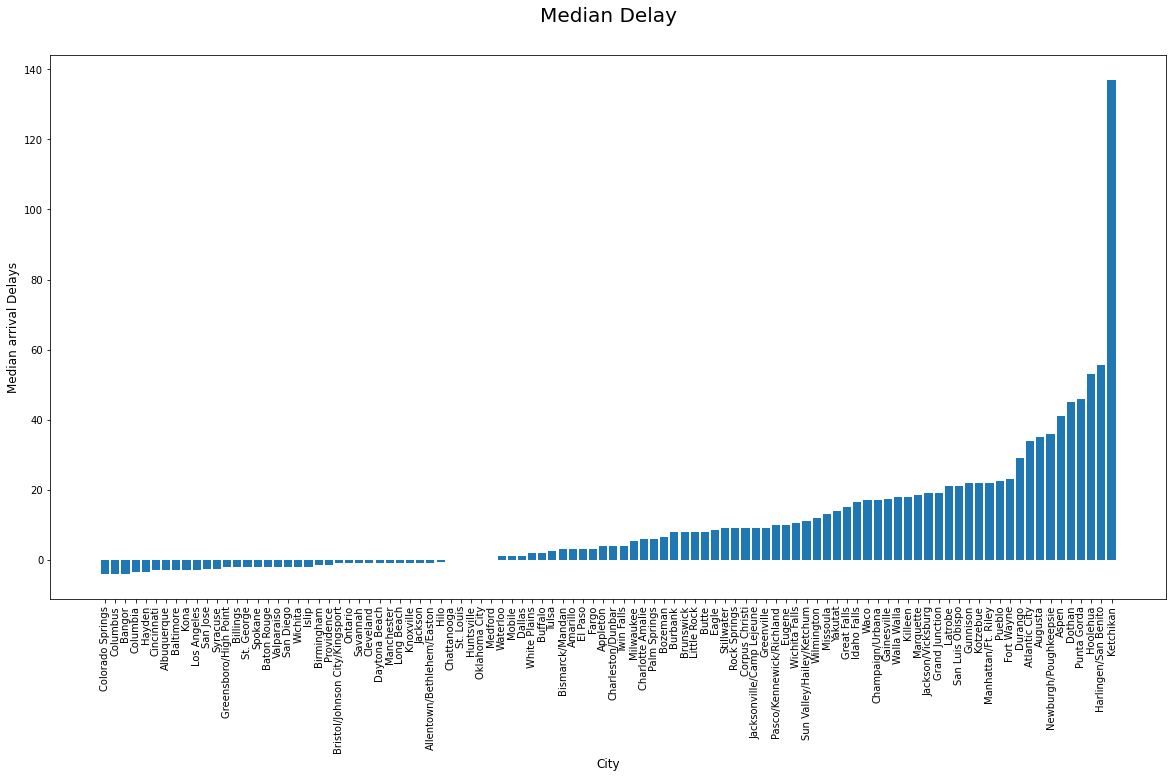

In [170]:
# PLOT CITY /delay (most med)
city_delays= city_delay_dest_med.tail(100)
import matplotlib.pyplot as plt

x = city_delays.dest_city
y = city_delays.arr_delay

fig, ax = plt.subplots( figsize = (20,10))

ax.bar(x,y)
ax.set_ylabel('Median arrival Delays', fontsize=12)
ax.set_xlabel('City', fontsize=12)
ax.set_title('Median Delay', fontsize=20, y=1.05)
plt.xticks(rotation = 90)
plt.show()

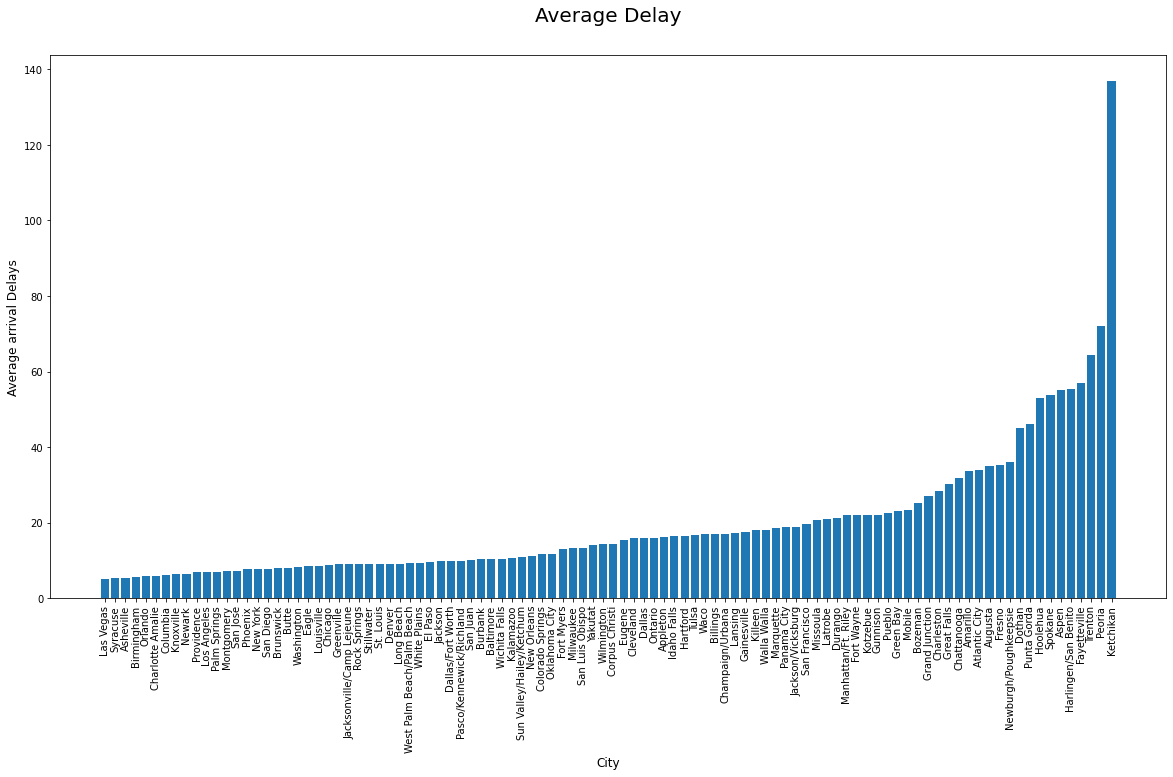

In [171]:
# Plot City and Delay

city_delays= city_delay_dest_mean.tail(100)
import matplotlib.pyplot as plt

x = city_delays.dest_city
y = city_delays.arr_delay

fig, ax = plt.subplots( figsize = (20,10))

ax.bar(x,y)
ax.set_ylabel('Average arrival Delays', fontsize=12)
ax.set_xlabel('City', fontsize=12)
ax.set_title('Average Delay', fontsize=20, y=1.05)
plt.xticks(rotation = 90)
plt.show()

#### Get average Delay per airport

In [78]:
# Get delay for airports

def get_avg_delay(df, col_list):
    df.loc[:, col_list] = df.loc[:, col_list].fillna(0)
    df_avg_delay = pd.DataFrame(df.dest.unique(), columns=['dest'])
    for col in col_list:
        s = df.groupby('dest')[col].mean()
        s.name = 'avg_' + col
        df_avg_delay = df_avg_delay.merge(s.to_frame(), on='dest', how='left')
    return df_avg_delay

df_delays = get_avg_delay(df, ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay'])
df_delays

,dest,avg_carrier_delay,avg_weather_delay,avg_nas_delay,avg_security_delay,avg_late_aircraft_delay
0,ATL,3.173297,0.613682,1.667690,0.007732,4.234801
1,DFW,5.197108,0.930523,3.328258,0.012855,7.318387
2,TPA,4.049431,0.385611,1.858696,0.031056,4.595497
3,SEA,3.459379,0.470156,2.840360,0.040028,4.439721
4,DAL,3.776942,0.135461,1.627032,0.021373,5.041541
...,...,...,...,...,...,...
355,OWB,11.833333,0.000000,2.666667,0.000000,0.000000
356,HGR,27.875000,3.375000,0.000000,0.000000,1.875000
357,OGD,7.800000,14.000000,1.000000,0.000000,11.000000
358,ADK,7.600000,0.000000,3.000000,0.000000,3.600000
